# Introduction to Convolutional Neural Netowrks and computer vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover pattherns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get the data

the images we're working with are from the Food101 dataset (101 different classes of food) from kaggle.

However we've modified it to only use tow classes (pizza and steak) using the image data modification notebook from github mrdbourke in extra

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-04-09 18:46:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.207, 142.250.152.207, 142.250.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  57.1MB/s    in 1.8s    

2024-04-09 18:46:44 (57.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Become one with dataset

Visualzing many samples of data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [5]:
import os

def walk_path(path):
  for dirpath, dirnames, filenames in os.walk(path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images at filepath {dirpath}")

In [6]:
walk_path("pizza_steak")

There are 2 directories and 0 images at filepath pizza_steak
There are 2 directories and 0 images at filepath pizza_steak/test
There are 0 directories and 250 images at filepath pizza_steak/test/steak
There are 0 directories and 250 images at filepath pizza_steak/test/pizza
There are 2 directories and 0 images at filepath pizza_steak/train
There are 0 directories and 750 images at filepath pizza_steak/train/steak
There are 0 directories and 750 images at filepath pizza_steak/train/pizza


To Visualize our images let's get the class names programmatically

In [7]:
# GEt the class names programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names   = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target dir
  target_folder = os.path.join(target_dir, target_class)

  random_image = random.sample(os.listdir(target_folder), 1)

  # Read the image and plot using matplotlib
  img = mpimg.imread(os.path.join(target_folder, random_image[0]))

  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


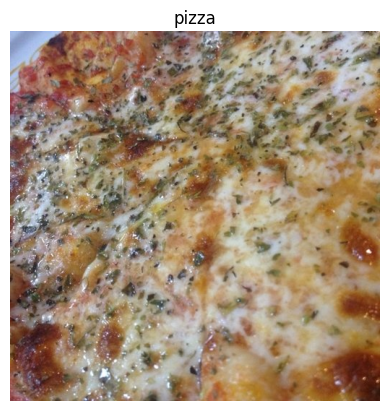

In [9]:
img = view_random_image("pizza_steak/train","pizza");

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[159, 181, 228],
        [160, 182, 229],
        [160, 182, 229],
        ...,
        [170, 153, 137],
        [220, 201, 184],
        [229, 211, 191]],

       [[163, 185, 232],
        [163, 185, 232],
        [163, 185, 232],
        ...,
        [197, 180, 164],
        [222, 203, 186],
        [209, 191, 171]],

       [[165, 186, 231],
        [165, 186, 231],
        [164, 187, 231],
        ...,
        [195, 178, 160],
        [186, 169, 149],
        [162, 146, 123]],

       ...,

       [[131,  62,  65],
        [128,  59,  62],
        [125,  56,  59],
        ...,
        [ 62,  24,  13],
        [ 64,  28,  16],
        [ 67,  31,  19]],

       [[136,  70,  74],
        [127,  61,  65],
        [119,  53,  57],
        ...,
        [ 63,  25,  14],
        [ 65,  27,  16],
        [ 67,  29,  18]],

       [[134,  69,  75],
        [137,  72,  78],
        [138,  71,  78],
        ...,
        [ 63,  25,  1

In [11]:
img.shape

(512, 512, 3)

## An end-to-end example

let's build a convolutional netural network to find patterns in our images, more specifically we need way to:

* Load our images
* preprocess our images
* Build a CNN to find patterns in our images
* compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# setup path for our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"
# import data from directroies and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size  = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile our CNN classsifer
model_1.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        validation_data = valid_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 175ms/step - loss: 0.5388 - accuracy: 0.7167 - val_loss: 0.4106 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4387 - accuracy: 0.8053 - val_loss: 0.3688 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4089 - accuracy: 0.8313 - val_loss: 0.3293 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3640 - accuracy: 0.8467 - val_loss: 0.3311 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3340 - accuracy: 0.8627 - val_loss: 0.3270 - val_accuracy: 0.8520


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before
let replicate the model we've build in a prevois section to see if it works in our image data

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        validation_data = valid_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 126ms/step - loss: 0.7299 - accuracy: 0.5093 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 136ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 117ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parametres than our CNN (model_1) let's try to improve model_2

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_3.compile(loss ='binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data,
                        validation_data = valid_data,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(valid_data),
                        epochs = 5)

Epoch 1/5
47/47 [==============================] - 7s 120ms/step - loss: 2.3855 - accuracy: 0.6207 - val_loss: 1.8181 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 1.3747 - accuracy: 0.6533 - val_loss: 1.4425 - val_accuracy: 0.6260
Epoch 3/5
47/47 [==============================] - 6s 138ms/step - loss: 0.7523 - accuracy: 0.7220 - val_loss: 0.4247 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.5199 - accuracy: 0.7753 - val_loss: 0.4347 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 6s 125ms/step - loss: 0.5067 - accuracy: 0.7673 - val_loss: 0.6411 - val_accuracy: 0.6940


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with data
2. Preprocess the data
3. Created a model
4. Fit the modle
5. Evaluate the model
6. Adjust the different parameters
7. Repeat until satisfied

## 1. Become one with data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


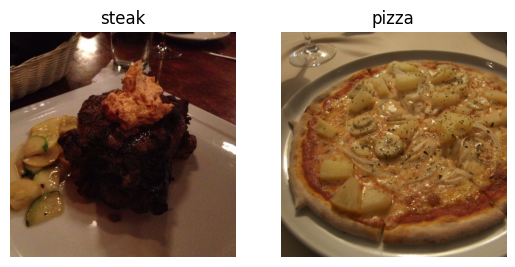

In [13]:
#Visualize the data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train", 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train", 'pizza')


## 2. Preprocess the data

In [14]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our Next step is to turn data into **Batches**

In [15]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               class_mode = 'binary',
                                               target_size = (224, 224),
                                               batch_size = 32)

test_data= test_datagen.flow_from_directory(test_dir,
                                            class_mode = 'binary',
                                            target_size = (224, 224),
                                            batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
image, labels = train_data.next()

In [17]:
image.shape, labels.shape

((32, 224, 224, 3), (32,))

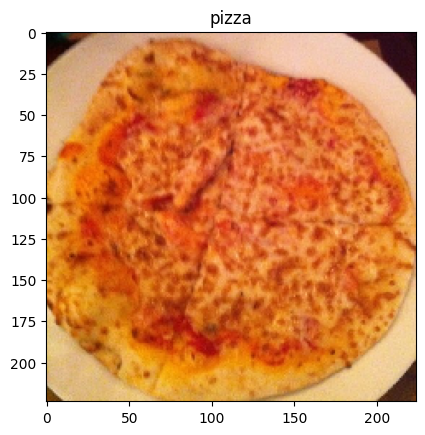

In [18]:
plt.imshow(image[0])
class_names = ['pizza', 'steak']
plt.title(class_names[int(labels[0])]);

## 3. Create the model

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Input
from tensorflow.keras import Sequential

In [ ]:
# Create the model

model_4 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = 'valid',
           activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation= 'relu'),
    Conv2D(10, 3,  activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_4.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_4 = model_4.fit(train_data,
                        validation_data = test_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 177ms/step - loss: 0.6104 - accuracy: 0.7213 - val_loss: 0.3951 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3817 - accuracy: 0.8353 - val_loss: 0.3884 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 7s 144ms/step - loss: 0.2503 - accuracy: 0.9140 - val_loss: 0.3356 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.1114 - accuracy: 0.9720 - val_loss: 0.3233 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.0465 - accuracy: 0.9947 - val_loss: 0.4792 - val_accuracy: 0.8060


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 4s 199ms/step - loss: 0.3270 - accuracy: 0.8520


[0.3270294666290283, 0.8519999980926514]

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 86ms/step - loss: 0.4792 - accuracy: 0.8060


[0.47916460037231445, 0.8059999942779541]

## 5. Evaluating our model

In [21]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [22]:
# plot the validation and training curve separately

def plot_loss_curve(history):
  """
  Return separate loss curves for training and validation metrics
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize = (10, 5))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title('loss')
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs , acc , label = 'training_acc')
  plt.plot(epochs, val_acc, label = 'val_acc')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


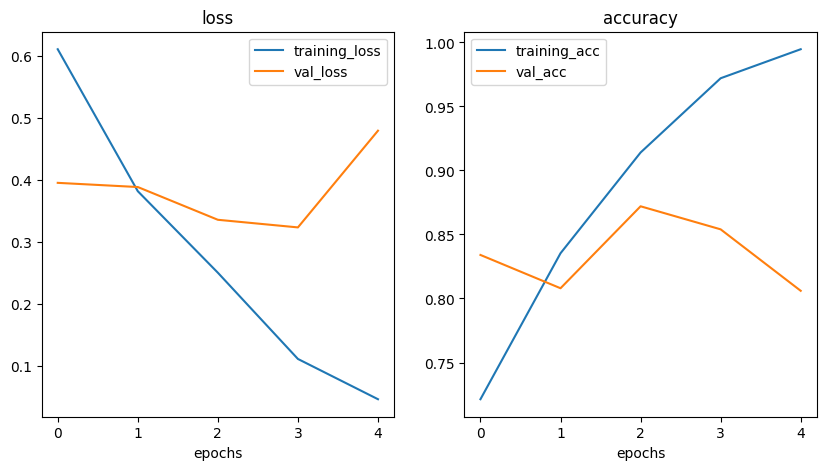

In [ ]:
plot_loss_curve(history_4)

`This means our data is overfitting`

## 6. Adjust the model parameters

fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce the over fitting

ways to induce overfitting

* Increasing the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting

* Add data augmentation
* add regularization layer (such as MaxPool2D)
* Add more data...

In [ ]:
# Create our new base line model
tf.random.set_seed(42)
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2, strides = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 26, 26, 10)       

In [ ]:
model_5.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 212ms/step - loss: 0.6175 - accuracy: 0.6573 - val_loss: 0.5177 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 8s 163ms/step - loss: 0.5161 - accuracy: 0.7640 - val_loss: 0.4156 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4753 - accuracy: 0.7867 - val_loss: 0.4065 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 5s 117ms/step - loss: 0.4293 - accuracy: 0.8147 - val_loss: 0.3641 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4056 - accuracy: 0.8153 - val_loss: 0.3686 - val_accuracy: 0.8360


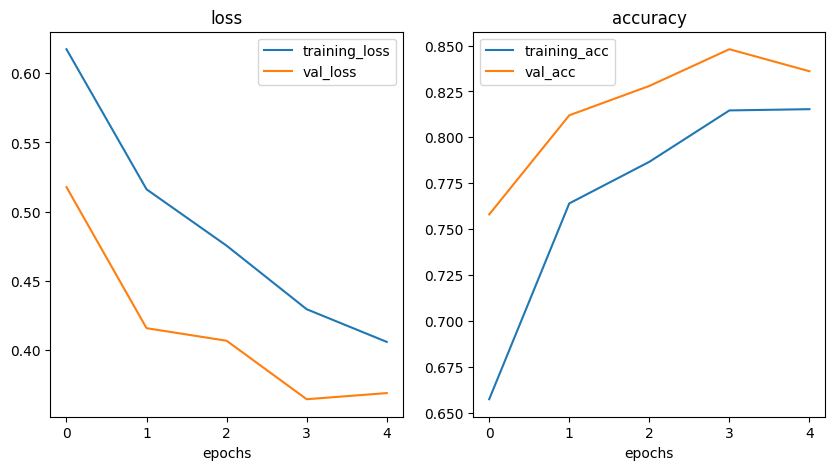

In [ ]:
plot_loss_curve(history_5)

## Next is Data augmentation

In [23]:
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range =0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

#Create image data Generator without data Augmentation

train_datagen = ImageDataGenerator(rescale = 1./255)

# Create Image data generator without data augmentation
test_datagen = ImageDataGenerator(rescale = 1./255)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn model generalizable  (hopefully) patterns.

Altering might means adjusting the roation of an image, fliping it, cropping it.

In [24]:
# import data and augment it from training directory

print("Augemented training data")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = True)
print("Non Augemented training data")

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle= True)

print("non Augemented test data")
IMG_SIZE = (224, 224)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = 'binary',
                                             shuffle = True)

Augemented training data
Found 1500 images belonging to 2 classes.
Non Augemented training data
Found 1500 images belonging to 2 classes.
non Augemented test data
Found 500 images belonging to 2 classes.


Data Augmentaion is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our image are left as they are in directories but are modified as they're loaded into the model

Finally, let Visualize the Augmented data

In [25]:
images, labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next() # Note Labels are not augmented just image

Showing image number: 29


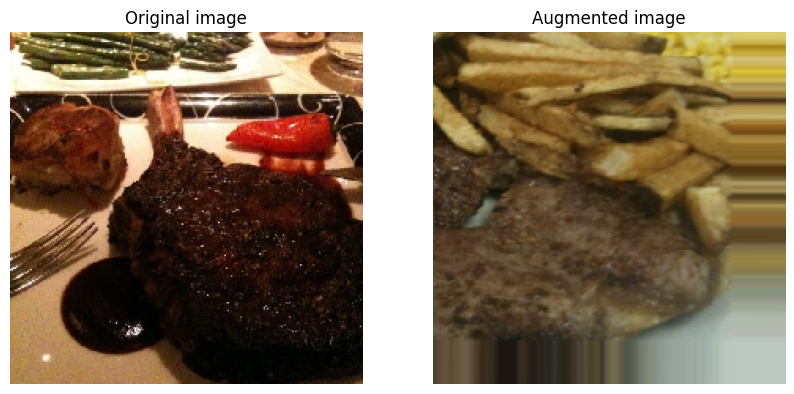

In [26]:
import random

random_number = random.randint(0, 31)
print(f"Showing image number: {random_number}")
plt.figure(figsize = (10, 5))
plt.subplot(1,2, 1)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis('off');

Now we've seen what augmented training data looks like, let's build a model and see how our model learn

In [27]:
model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_6.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 442ms/step - loss: 0.6764 - accuracy: 0.5647 - val_loss: 0.6162 - val_accuracy: 0.6060
Epoch 2/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5924 - accuracy: 0.6747 - val_loss: 0.4277 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 22s 458ms/step - loss: 0.5232 - accuracy: 0.7460 - val_loss: 0.3997 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.5000 - accuracy: 0.7587 - val_loss: 0.3591 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4843 - accuracy: 0.7793 - val_loss: 0.3453 - val_accuracy: 0.8640


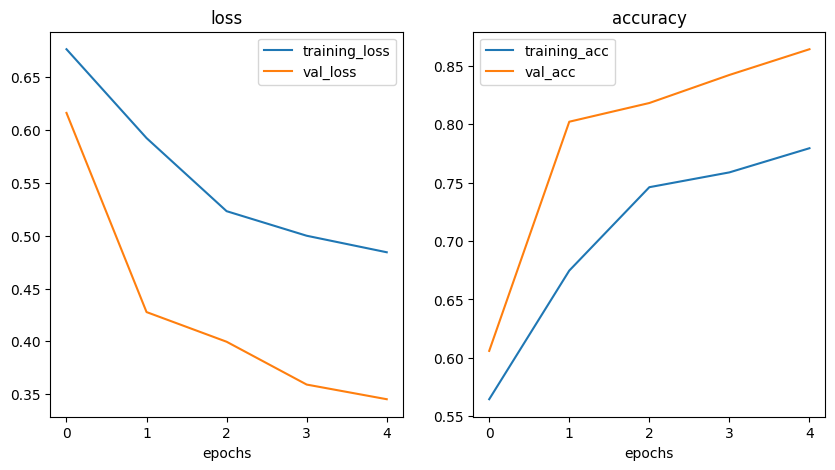

In [28]:
plot_loss_curve(history_6)

## doing prediciton on custom image

In [30]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2024-04-09 18:56:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2024-04-09 18:56:20 (32.3 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



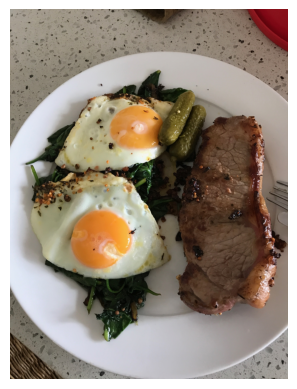

In [32]:
plt.imshow(steak)
plt.axis('off');

In [33]:
steak.shape

(4032, 3024, 3)

In [34]:
def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename)
  #decode the read file into a tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  #Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [35]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

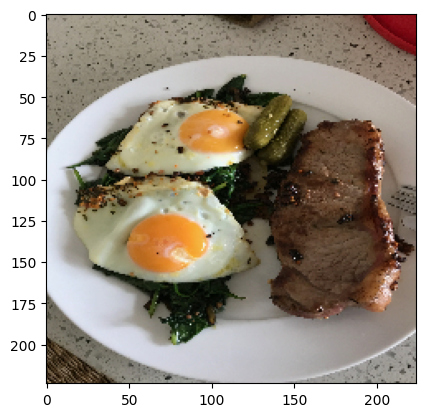

In [36]:
plt.imshow(steak)

In [48]:
y_pred = model_6.predict(tf.expand_dims(steak, axis = 0))

1/1 [==============================] - 0s 18ms/step


In [50]:
class_names[int(tf.round(y_pred))];